In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import os
import numpy as np
from PIL import Image


dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
classes = {
    "Mammals": ["badger", "bear", "cat", "chimpanzee", "cow", "coyote", "deer", "dog", "dolphin", "donkey", 
                "elephant", "fox", "goat", "gorilla", "hare", "hedgehog", "hippopotamus", "horse", "hyena", 
                "kangaroo", "koala", "leopard", "lion", "mouse", "okapi", "orangutan", "otter", "panda", 
                "pig", "raccoon", "rat", "reindeer", "rhinoceros", "seal", "sheep", "squirrel", "tiger", 
                "whale", "wolf", "wombat", "zebra"],
    "Birds": ["hornbill", "hummingbird", "owl", "pelecaniformes", "penguin", "sparrow", "starfish", "swan", "turkey", "woodpecker"],
    "Insects": ["bee", "butterfly", "caterpillar", "cockroach", "grasshopper", "ladybugs", "mosquito", "moth"],
    "Fish": ["goldfish", "seahorse", "shark"],
    "Reptiles": ["lizard", "snake", "turtle"]
}
target_classes = list(classes.keys())

In [6]:
target_classes

['Mammals', 'Birds', 'Insects', 'Fish', 'Reptiles']

In [7]:
images = []
labels = []

for target_class in target_classes:
    class_names = classes[target_class]
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            image = image.resize((224, 224))
            images.append(image)
            label = target_classes.index(target_class) if class_name in class_names else -1
            labels.append(label)

In [8]:
images = np.array(images)
labels = np.array(labels)

In [9]:
np.unique(labels)

array([0, 1, 2, 3, 4])

In [10]:
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

In [11]:
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels, num_classes=5)

2024-02-26 12:03:10.646773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 12:03:10.646874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 12:03:10.821766: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3),padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
from sklearn.model_selection import KFold

In [14]:
k_folds = 3

accuracy_scores = []

kf = KFold(n_splits=k_folds, shuffle=True)


for train_index, test_index in kf.split(images, labels):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test =labels_one_hot[train_index],labels_one_hot[test_index]
    model.fit(X_train, y_train, epochs=15)
    
    loss, accuracy = model.evaluate(X_test, y_test)

    accuracy_scores.append(accuracy)
print("Average Accuracy:", np.mean(accuracy_scores))

Epoch 1/15


I0000 00:00:1708949008.805312     126 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


82/82 [==============================] - 11s 52ms/step - loss: 3.0829 - accuracy: 0.5319
Epoch 2/15
82/82 [==============================] - 4s 43ms/step - loss: 1.1537 - accuracy: 0.6308
Epoch 3/15
82/82 [==============================] - 4s 43ms/step - loss: 0.9614 - accuracy: 0.6762
Epoch 4/15
82/82 [==============================] - 4s 43ms/step - loss: 0.9114 - accuracy: 0.6938
Epoch 5/15
82/82 [==============================] - 4s 44ms/step - loss: 0.7713 - accuracy: 0.7342
Epoch 6/15
82/82 [==============================] - 4s 44ms/step - loss: 0.6887 - accuracy: 0.7454
Epoch 7/15
82/82 [==============================] - 4s 44ms/step - loss: 0.6918 - accuracy: 0.7562
Epoch 8/15
82/82 [==============================] - 4s 44ms/step - loss: 0.6239 - accuracy: 0.7750
Epoch 9/15
82/82 [==============================] - 4s 44ms/step - loss: 0.5245 - accuracy: 0.8096
Epoch 10/15
82/82 [==============================] - 4s 44ms/step - loss: 0.4614 - accuracy: 0.8319
Epoch 11/15
82/82 [

122/122 [==============================] - 2s 18ms/step


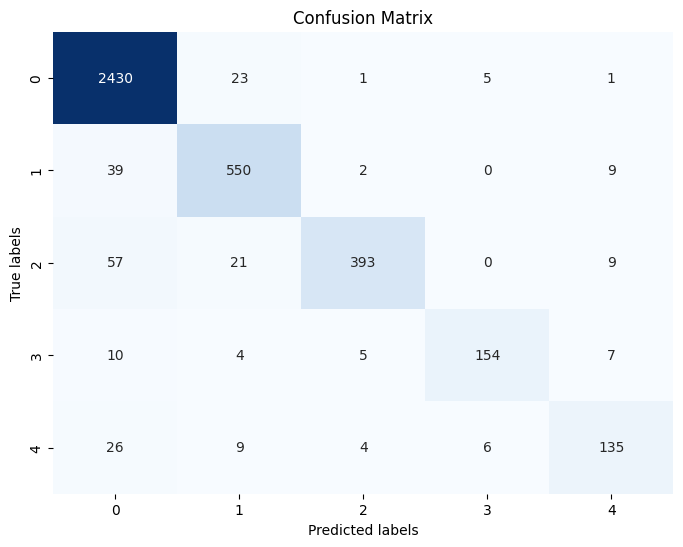

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_all = model.predict(images)
y_pred_classes_all = np.argmax(y_pred_all, axis=1)
y_true_classes_all = np.argmax(labels_one_hot, axis=1)

conf_matrix_all = confusion_matrix(y_true_classes_all, y_pred_classes_all)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_all, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [17]:
precision_scores = precision_score(y_true_classes_all, y_pred_classes_all, average=None)
recall_scores = recall_score(y_true_classes_all, y_pred_classes_all, average=None)
f1_scores = f1_score(y_true_classes_all, y_pred_classes_all, average=None)

for i in range(len(precision_scores)):
    print(f"Class {i} - Precision: {precision_scores[i]}, Recall: {recall_scores[i]}, F1-score: {f1_scores[i]}")

Class 0 - Precision: 0.9484777517564403, Recall: 0.9878048780487805, F1-score: 0.9677419354838711
Class 1 - Precision: 0.9060955518945635, Recall: 0.9166666666666666, F1-score: 0.911350455675228
Class 2 - Precision: 0.9703703703703703, Recall: 0.81875, F1-score: 0.8881355932203389
Class 3 - Precision: 0.9333333333333333, Recall: 0.8555555555555555, F1-score: 0.8927536231884059
Class 4 - Precision: 0.8385093167701864, Recall: 0.75, F1-score: 0.7917888563049854


In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

1/1 [==============================] - 0s 105ms/step


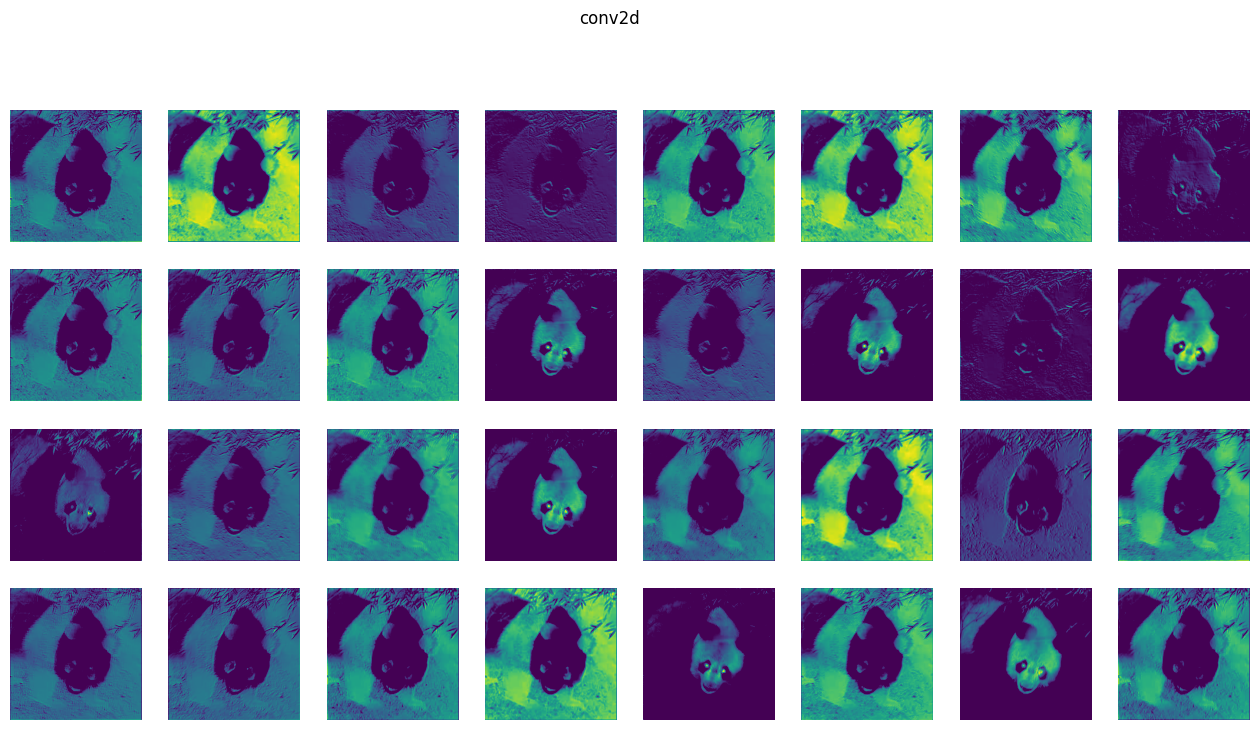

1/1 [==============================] - 0s 231ms/step


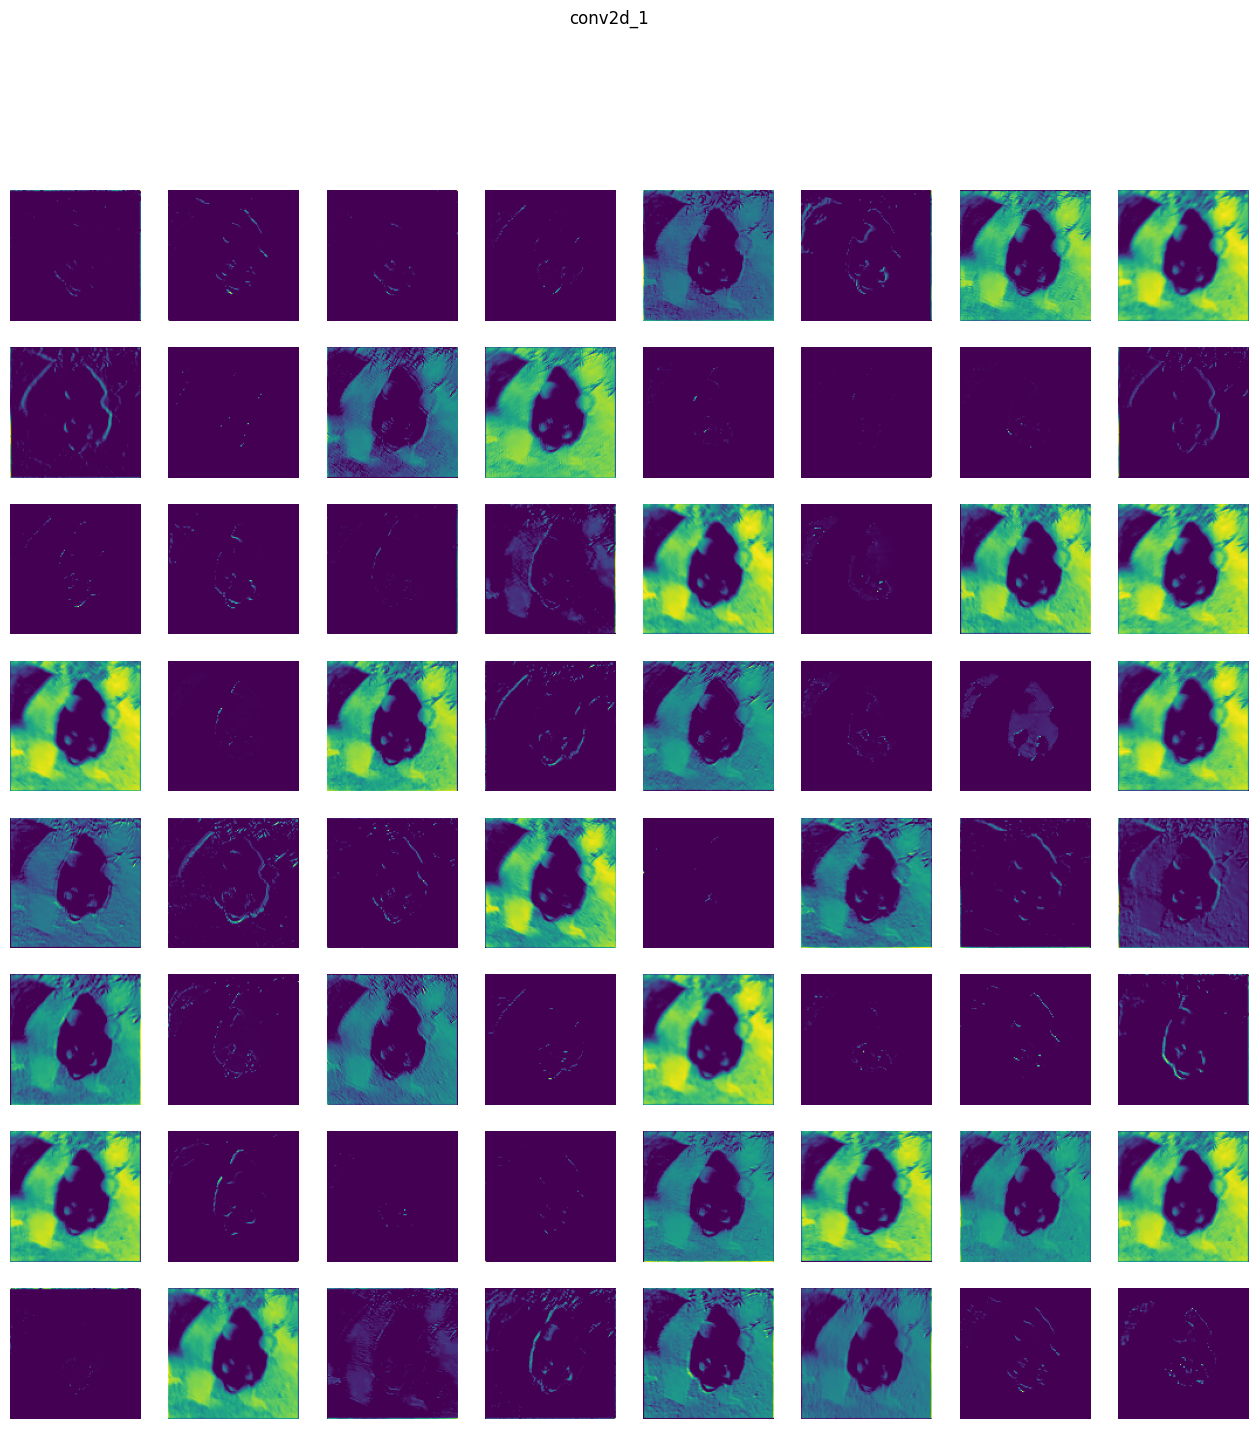

1/1 [==============================] - 0s 260ms/step


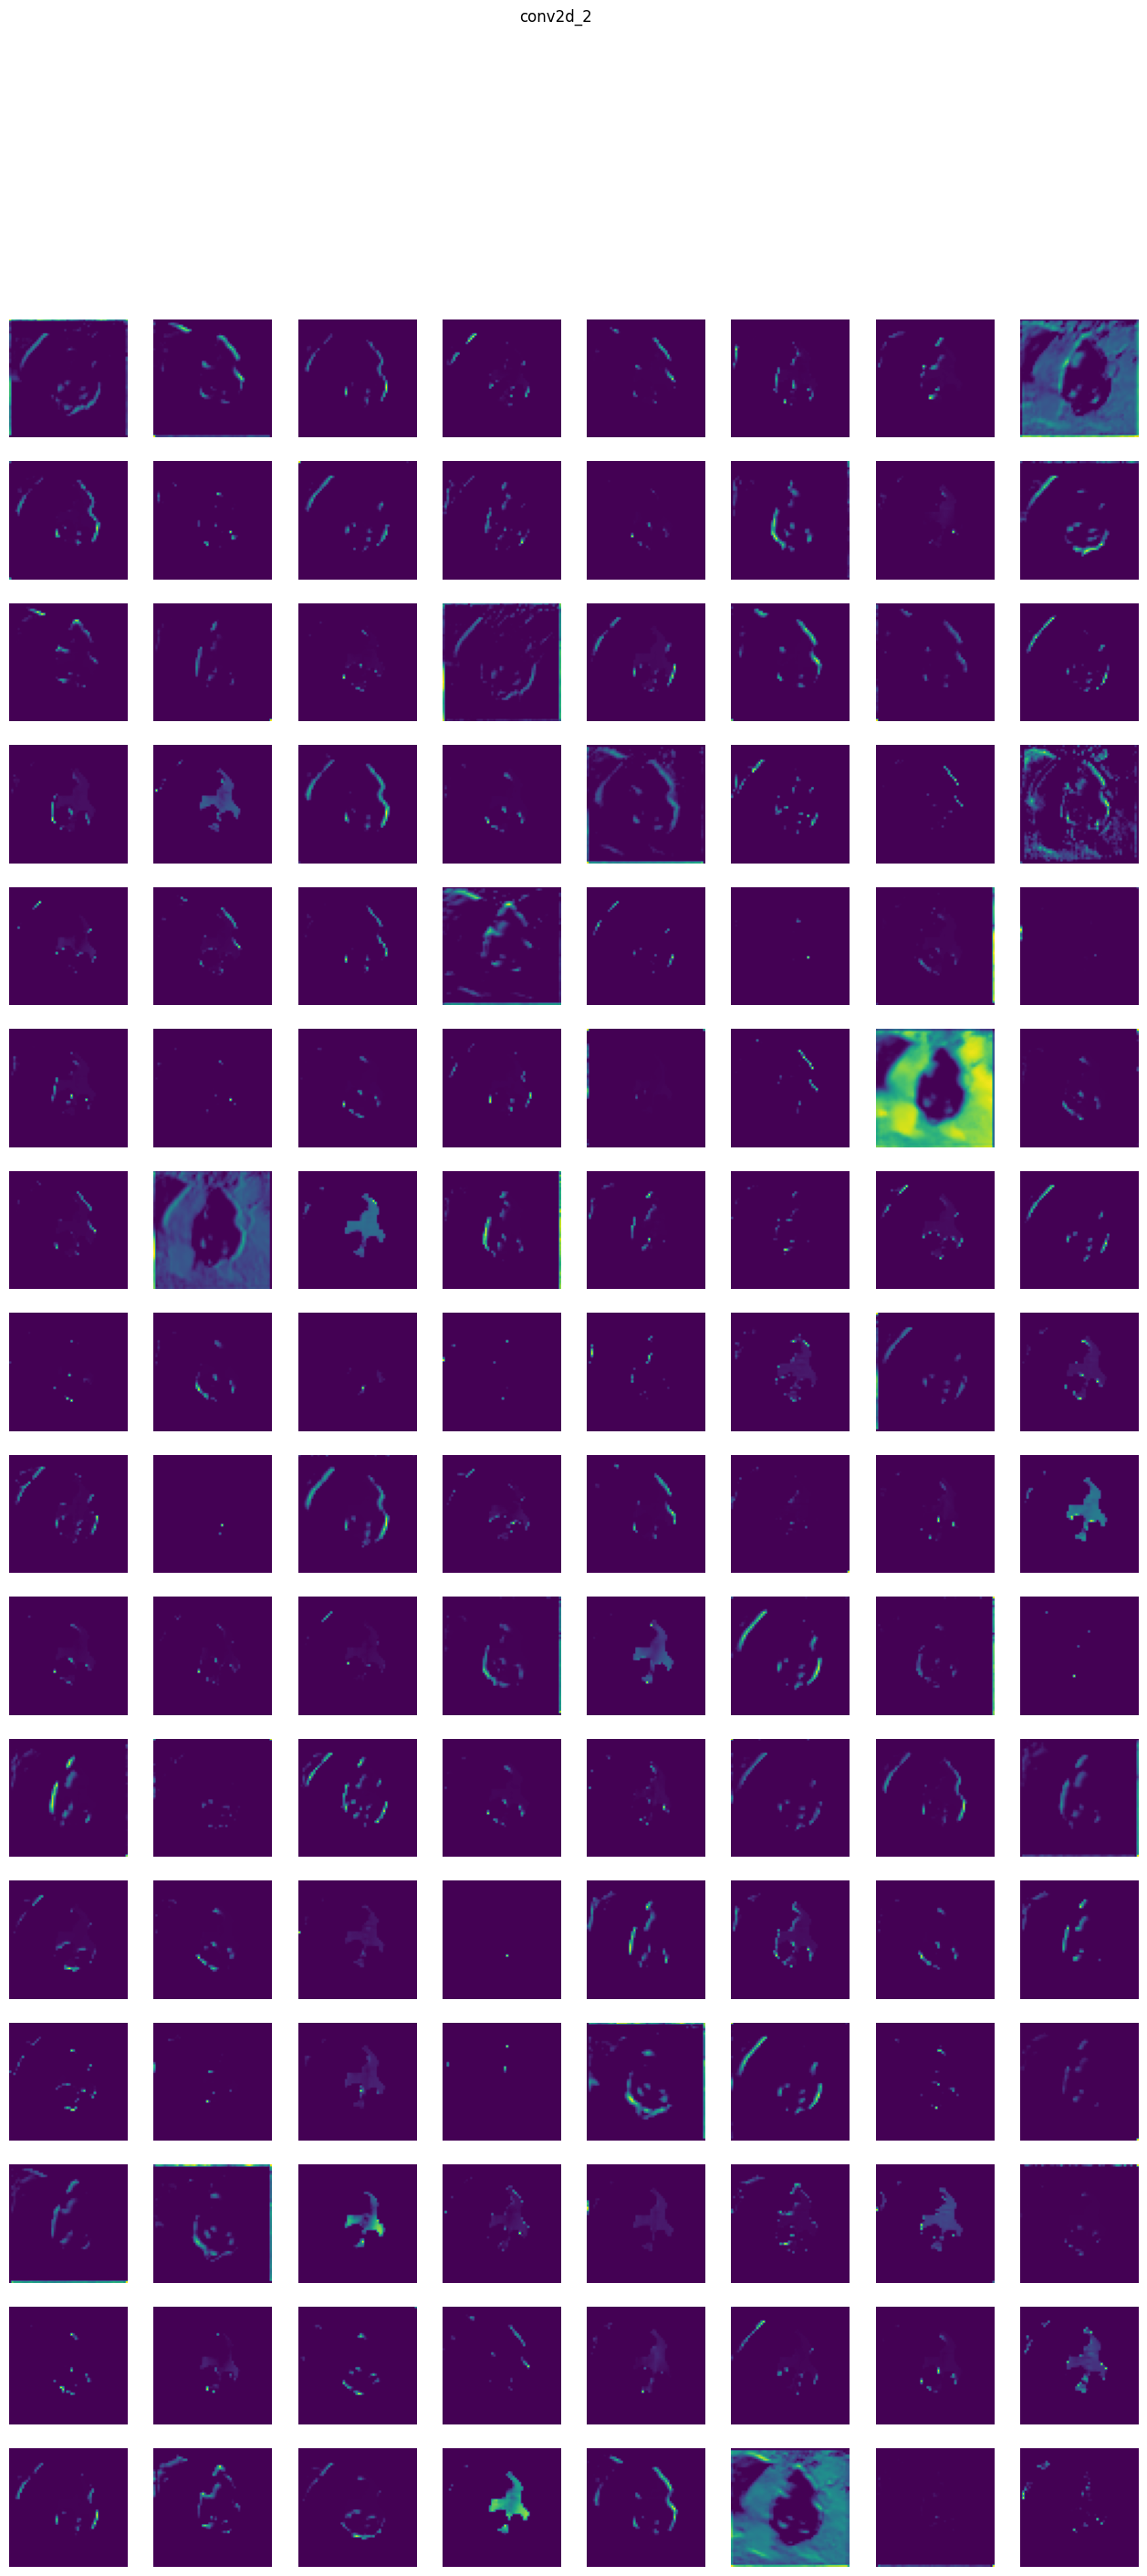

In [19]:
img_path = '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/panda/03b7ec608a.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor =np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

def plot_conv_output(layer_name):
    conv_layer = model.get_layer(layer_name)
    activation_model = models.Model(inputs=model.input, outputs=conv_layer.output)
    activations = activation_model.predict(img_tensor)
    
    num_filters = activations.shape[-1]
    columns = 8
    rows = num_filters // columns + 1
    
    plt.figure(figsize=(columns * 2, rows * 2))
    for i in range(num_filters):
        plt.subplot(rows, columns, i+1)
        plt.imshow(activations[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(layer_name)
    plt.show()

for layer in model.layers:
    if isinstance(layer, layers.Conv2D):
        plot_conv_output(layer.name)